In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('edited-form.csv')
df.drop(['Timestamp', 'Unnamed: 11'], axis=1, inplace=True)
df = df.replace(['Agree Strongly', 'Agree a little', 'Neither agree nor disagree', 'Disagree a little', 'Disagree Strongly'], [5,4,3,2,1])

In [3]:
df['EXT-R'] = 6 - df['EXT-R']
df['AGR-R'] = 6 - df['AGR-R']
df['CSN-R'] = 6 - df['CSN-R']
df['NEU-R'] = 6 - df['NEU-R']
df['OPN-R'] = 6 - df['OPN-R']

In [4]:
df_traits = df[['EXT', 'EXT-R', 'AGR', 'AGR-R', 'CSN', 'CSN-R', 'NEU', 'NEU-R', 'OPN', 'OPN-R']]
df['Trait_Scores'] = df_traits.mean(axis=1)

In [5]:
df['extroversion'] = (df['EXT'] + df['EXT-R']) / 2
df['agreeableness'] = (df['AGR'] + df['AGR-R']) / 2
df['conscientiousness'] = (df['CSN'] + df['CSN-R']) / 2
df['neuroticism'] = (df['NEU'] + df['NEU-R']) / 2
df['openness'] = (df['OPN'] + df['OPN-R']) / 2
df

,EXT,EXT-R,AGR,AGR-R,CSN,CSN-R,NEU,NEU-R,OPN,OPN-R,Trait_Scores,extroversion,agreeableness,conscientiousness,neuroticism,openness
0,4,2,4,4,5,4,2,1,4,2,3.2,3.0,4.0,4.5,1.5,3.0
1,3,3,4,2,5,1,4,4,5,2,3.3,3.0,3.0,3.0,4.0,3.5
2,4,3,3,3,4,5,4,2,4,5,3.7,3.5,3.0,4.5,3.0,4.5
3,2,2,4,2,4,1,4,3,5,1,2.8,2.0,3.0,2.5,3.5,3.0
4,1,1,4,4,4,3,4,1,3,4,2.9,1.0,4.0,3.5,2.5,3.5
5,3,1,1,5,5,2,3,2,5,1,2.8,2.0,3.0,3.5,2.5,3.0
6,4,4,4,2,5,2,5,5,5,1,3.7,4.0,3.0,3.5,5.0,3.0
7,5,3,5,3,4,1,4,3,5,2,3.5,4.0,4.0,2.5,3.5,3.5
8,5,4,4,4,5,2,2,1,4,4,3.5,4.5,4.0,3.5,1.5,4.0
9,4,2,2,3,4,2,3,3,4,2,2.9,3.0,2.5,3.0,3.0,3.0


In [6]:
df['is_researcher'] = ((df['conscientiousness'] > 3) & (df['agreeableness'] > 3) & (df['openness'] > 3)).astype(int)
print(df.head())

   EXT  EXT-R  AGR  AGR-R  CSN  CSN-R  NEU  NEU-R  OPN  OPN-R  Trait_Scores  \
0    4      2    4      4    5      4    2      1    4      2           3.2   
1    3      3    4      2    5      1    4      4    5      2           3.3   
2    4      3    3      3    4      5    4      2    4      5           3.7   
3    2      2    4      2    4      1    4      3    5      1           2.8   
4    1      1    4      4    4      3    4      1    3      4           2.9   

   extroversion  agreeableness  conscientiousness  neuroticism  openness  \
0           3.0            4.0                4.5          1.5       3.0   
1           3.0            3.0                3.0          4.0       3.5   
2           3.5            3.0                4.5          3.0       4.5   
3           2.0            3.0                2.5          3.5       3.0   
4           1.0            4.0                3.5          2.5       3.5   

   is_researcher  
0              0  
1              0  
2          

In [7]:
X = df[['extroversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness']]
y = df['is_researcher']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [10]:
scores = cross_val_score(lr, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.01)


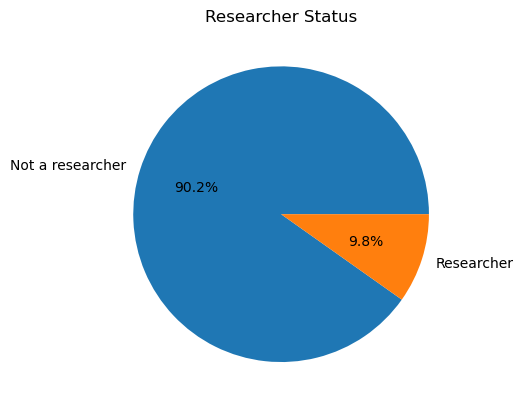

In [11]:
value_counts = df['is_researcher'].value_counts()
labels = ['Not a researcher', 'Researcher']
plt.pie(value_counts, labels=labels, autopct='%1.1f%%')
plt.title('Researcher Status')
plt.show()